#**Importing the Data**

In [ ]:
import numpy as np
import pandas as pd 
import os

In [ ]:
TAColumns = [
    'Unique user id',
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres',
    'Average ratings on religious institutions'
]

TAData = pd.read_csv('/content/sample_data/tripadvisor_review.csv', header=0, names=TAColumns)
TAData = TAData.set_index('Unique user id')

In [ ]:
TAData

,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on juice bars,Average ratings on restaurants,Average ratings on museums,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


# **Exploring our Datasets and Initial Analysis**

First we looked at the data and created a chart to show the differences in rating between the different categories

Average ratings on parks                     3.18
Average ratings on beaches                   2.84
Average ratings on religious institutions    2.80
Average ratings on resorts                   1.84
Average ratings on theatres                  1.57
Average ratings on dance clubs               1.35
Average ratings on juice bars                1.01
Average ratings on museums                   0.94
Average ratings on art galleries             0.89
Average ratings on restaurants               0.53
dtype: float64


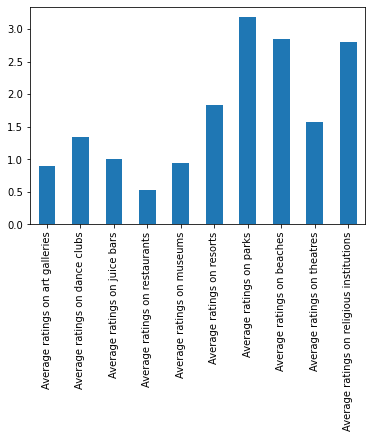

In [ ]:
# Rank the categories by highest average:
TAAvg = TAData.mean(axis=0).round(2)
print(TAAvg.sort_values(ascending = False))
TAAvg.plot.bar()

In [ ]:
mostLike = []
for col in TAColumns[1:]:
    mask = (TAData[col] >= 1)
    try:
        ratio = (mask.value_counts()[True] / (mask.value_counts()[False]+mask.value_counts()[True]))*100
        print(str(ratio.round(2)) + '% users considered near average or above for', col)
        if ratio > 50:
            mostLike.append(col)
    except:
        print('100% users considered near average or above for', col)
        mostLike.append(col)
print('--------------------------------------')
print('Attractions that most people think are near average or above:') 
TAData[mostLike].head()

27.14% users considered near average or above for Average ratings on art galleries
82.76% users considered near average or above for Average ratings on dance clubs
44.9% users considered near average or above for Average ratings on juice bars
3.16% users considered near average or above for Average ratings on restaurants
40.61% users considered near average or above for Average ratings on museums
95.31% users considered near average or above for Average ratings on resorts
100% users considered near average or above for Average ratings on parks
100% users considered near average or above for Average ratings on beaches
97.86% users considered near average or above for Average ratings on theatres
100% users considered near average or above for Average ratings on religious institutions
--------------------------------------
Attractions that most people think are near average or above:


,Average ratings on dance clubs,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,
User 1,1.8,2.42,3.19,2.79,1.82,2.42
User 2,2.2,3.18,3.21,2.63,1.86,2.32
User 3,0.8,1.54,3.18,2.80,1.31,2.50
User 4,1.8,1.52,3.18,2.96,1.57,2.86
User 5,1.2,2.02,3.18,2.78,1.18,2.54


In [ ]:
TACor = {}
for i in TAData:
    TACor[i] = []
    for j in TAData:
        if i == j:
            continue
        if abs(TAData[i].corr(TAData[j])) > 0.5:
            TACor[i].append((j,round(TAData[i].corr(TAData[j]), 4)))
TACor = {key:val for key, val in TACor.items() if val != []} 
pd.DataFrame(TACor.values(), index=TACor.keys())

,0,1
Average ratings on juice bars,"(Average ratings on parks, 0.7507)",None
Average ratings on museums,"(Average ratings on resorts, 0.5813)",None
Average ratings on resorts,"(Average ratings on museums, 0.5813)",None
Average ratings on parks,"(Average ratings on juice bars, 0.7507)","(Average ratings on religious institutions, -0..."
Average ratings on religious institutions,"(Average ratings on parks, -0.7107)",None


This table shows the correlations between average ratings greater than 50% for the Tripadvisor Dataset. some of the correlations are intuitive, whereas others are somewhat surprising. For example, the strong inverse correlation between parks and religious institutions.

# **Finding Clusters in our Data**

We decided to use K-Means Clustering since it seemed the a solid way to explore whether we had clusters and what they are.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
commonCategories =[
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]

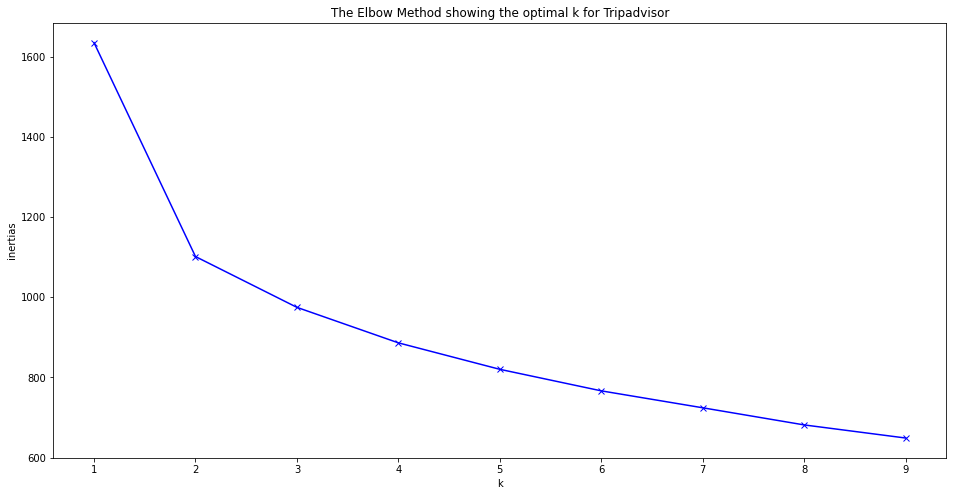

In [ ]:
TANew = TAData[commonCategories] 
inertias = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(TANew)
    inertias.append(model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('The Elbow Method showing the optimal k for Tripadvisor')
plt.show()

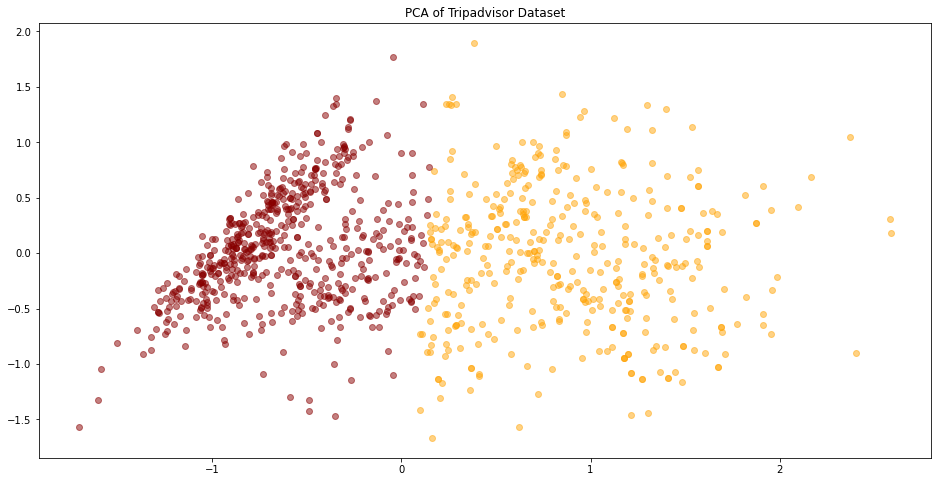

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(TANew)
clusterNames = kmeans.labels_

X = TANew
y = clusterNames
target_names = [0,1]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


plt.figure(figsize=(16,8))
colors = ['#ffa60a', '#880000', '#0a0054',]

for color, i, target_name in zip(colors, range(0,4), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)
plt.title('PCA of Tripadvisor Dataset')

plt.show()

In [ ]:
people = list(clusterNames)

zero = []
one = []

for i in range(len(people)):
    if people[i] == 0:
        zero.append(i)
    elif people[i] == 1:
        one.append(i)

In [ ]:
TANew.iloc[zero].mean() #Yellow Cluster

Average ratings on art galleries    0.901940
Average ratings on dance clubs      1.413333
Average ratings on juice bars       1.805124
Average ratings on restaurants      0.574751
Average ratings on museums          1.161592
Average ratings on resorts          2.156517
Average ratings on parks            3.186816
Average ratings on beaches          2.808184
Average ratings on theatres         1.524229
dtype: float64

In [ ]:
TANew.iloc[one].mean() # Red Cluster

Average ratings on art galleries    0.887111
Average ratings on dance clubs      1.310381
Average ratings on juice bars       0.462595
Average ratings on restaurants      0.503114
Average ratings on museums          0.785433
Average ratings on resorts          1.624775
Average ratings on parks            3.176851
Average ratings on beaches          2.853754
Average ratings on theatres         1.600882
dtype: float64

# **Predicting Ratings**

Based on the clusters we found, we wondered if we could predict a user's rating for a attraction based on their other ratings. To answer this question we decided to use the K-Closest neighbors algorithm and test a few example users to see if we could predict their ratings.

Below we set up a sample user whos ratings were similar to an average user from the cluster that loves art galleries.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
TAKData = TAData[commonCategories]
features = [ 
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]

xTrainDict = TAKData[features].to_dict(orient='records') # defining training data
yTrain = TAKData['Average ratings on restaurants'] # what we want to find out 
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

(12, 0.12420068027210884)


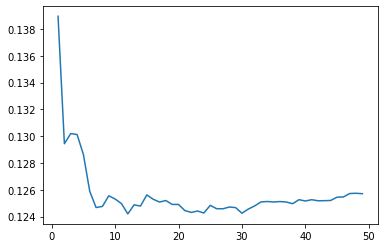

In [ ]:
MAE = {}
high = (0,99)
for i in range(1,50):
    model = KNeighborsRegressor(n_neighbors=i)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    scores = -cross_val_score(pipeline, xTrainDict, yTrain, cv=5, scoring="neg_mean_absolute_error") # run pipeline with 5 folds 
    MAE[i]=scores.mean() # find mean to plot easily 
    if scores.mean() < high[1]: #store value if lower 
        high = (i,scores.mean()) 
print(high)
plt.plot(*zip(*sorted(MAE.items()))) # plot all items 
plt.show()

From the graph above we see the optimal k is 12 with a MAE of 0.12. From the MAE we can see our model is pretty accurate with only 2.4% error on average. This model is a lot more predictive, and because we used cross validation we can be somewhat confident in the model's ability to generalize.